In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
df=pd.read_csv('train.csv')


In [3]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df.shape

(891, 9)

In [10]:
549/891


0.6161616161616161

In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
df.drop('Cabin',axis=1,inplace=True)

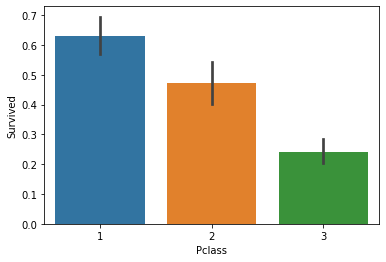

In [13]:
sns.barplot(df.Pclass,df.Survived)


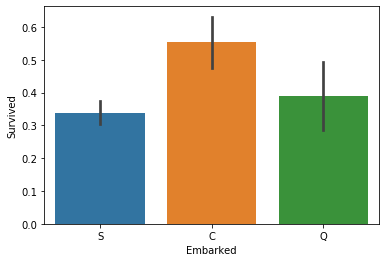

In [14]:
sns.barplot(df.Embarked,df.Survived)

### Pre-processing

In [15]:
df=pd.get_dummies(df,columns=['Sex'],drop_first=True)

In [16]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


AGE

In [17]:
####### VERY IMPORTANT
df['age'] = pd.cut(x=df['Age'], bins=[0, 12, 19, 30, 50, 80], labels=['Kids', 'Teens', 'Youth','Adult','Elderly'])

In [18]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male,age
0,0,3,22.0,1,0,7.2500,S,1,Youth
1,1,1,38.0,1,0,71.2833,C,0,Adult
2,1,3,26.0,0,0,7.9250,S,0,Youth
3,1,1,35.0,1,0,53.1000,S,0,Adult
4,0,3,35.0,0,0,8.0500,S,1,Adult
5,0,3,NaN,0,0,8.4583,Q,1,NaN
6,0,1,54.0,0,0,51.8625,S,1,Elderly
7,0,3,2.0,3,1,21.0750,S,1,Kids
8,1,3,27.0,0,2,11.1333,S,0,Youth
9,1,2,14.0,1,0,30.0708,C,0,Teens


In [20]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Sex_male      0
age         177
dtype: int64

In [21]:
df.drop('Age',axis=1,inplace=True)

In [22]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Sex_male,age
0,0,3,1,0,7.2500,S,1,Youth
1,1,1,1,0,71.2833,C,0,Adult
2,1,3,0,0,7.9250,S,0,Youth
3,1,1,1,0,53.1000,S,0,Adult
4,0,3,0,0,8.0500,S,1,Adult


In [23]:
df['age'].value_counts()

Youth      245
Adult      241
Teens       95
Kids        69
Elderly     64
Name: age, dtype: int64

In [24]:
df=pd.get_dummies(df,columns=['age'],drop_first=True)



In [25]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Sex_male,age_Teens,age_Youth,age_Adult,age_Elderly
0,0,3,1,0,7.2500,S,1,0,1,0,0
1,1,1,1,0,71.2833,C,0,0,0,1,0
2,1,3,0,0,7.9250,S,0,0,1,0,0
3,1,1,1,0,53.1000,S,0,0,0,1,0
4,0,3,0,0,8.0500,S,1,0,0,1,0


Fare

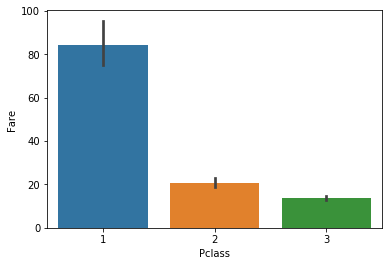

In [26]:
sns.barplot(df.Pclass,df.Fare)

In [27]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [28]:
df['fare']=pd.cut(x=df['Fare'],bins=[0,10,40,512],labels=['Low','Medium','High'])

In [29]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Sex_male,age_Teens,age_Youth,age_Adult,age_Elderly,fare
0,0,3,1,0,7.2500,S,1,0,1,0,0,Low
1,1,1,1,0,71.2833,C,0,0,0,1,0,High
2,1,3,0,0,7.9250,S,0,0,1,0,0,Low
3,1,1,1,0,53.1000,S,0,0,0,1,0,High
4,0,3,0,0,8.0500,S,1,0,0,1,0,Low


In [30]:
df['fare'].value_counts()

Medium    379
Low       321
High      173
Name: fare, dtype: int64

In [31]:
df=pd.get_dummies(df, columns=['fare'],drop_first=True)

In [32]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Sex_male,age_Teens,age_Youth,age_Adult,age_Elderly,fare_Medium,fare_High
0,0,3,1,0,7.2500,S,1,0,1,0,0,0,0
1,1,1,1,0,71.2833,C,0,0,0,1,0,0,1
2,1,3,0,0,7.9250,S,0,0,1,0,0,0,0
3,1,1,1,0,53.1000,S,0,0,0,1,0,0,1
4,0,3,0,0,8.0500,S,1,0,0,1,0,0,0


In [33]:
df.drop('Fare',axis=1,inplace=True)

Sib sp, Parch

In [34]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

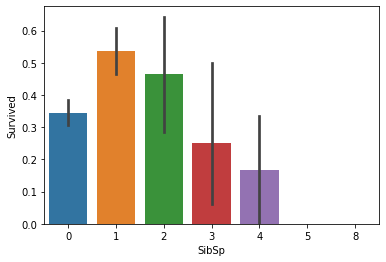

In [35]:
sns.barplot(df.SibSp,df.Survived)

In [36]:
#df['SibSp']=df['SibSp'].replace([1,2,3,4,5,6,7,8])x

In [37]:
df['accompanied']=df['SibSp']+df['Parch']

In [38]:
df['accompanied'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: accompanied, dtype: int64

In [39]:
df.head(30)

,Survived,Pclass,SibSp,Parch,Embarked,Sex_male,age_Teens,age_Youth,age_Adult,age_Elderly,fare_Medium,fare_High,accompanied
0,0,3,1,0,S,1,0,1,0,0,0,0,1
1,1,1,1,0,C,0,0,0,1,0,0,1,1
2,1,3,0,0,S,0,0,1,0,0,0,0,0
3,1,1,1,0,S,0,0,0,1,0,0,1,1
4,0,3,0,0,S,1,0,0,1,0,0,0,0
5,0,3,0,0,Q,1,0,0,0,0,0,0,0
6,0,1,0,0,S,1,0,0,0,1,0,1,0
7,0,3,3,1,S,1,0,0,0,0,1,0,4
8,1,3,0,2,S,0,0,1,0,0,1,0,2
9,1,2,1,0,C,0,1,0,0,0,1,0,1


In [40]:
df['single']= df['single']==1 if [df['SibSp']==0 & df['Parch']==0]

SyntaxError: invalid syntax (<ipython-input-40-d84df9cd66d6>, line 1)

In [ ]:
#df.loc[df['accompanied']>0,'not alone']==1


In [41]:
df.loc[df['accompanied'] !=0, ['accompanied']] = 'yes'
df.loc[df['accompanied']==0,['accompanied']]= 'no'

In [42]:
df.head()

,Survived,Pclass,SibSp,Parch,Embarked,Sex_male,age_Teens,age_Youth,age_Adult,age_Elderly,fare_Medium,fare_High,accompanied
0,0,3,1,0,S,1,0,1,0,0,0,0,yes
1,1,1,1,0,C,0,0,0,1,0,0,1,yes
2,1,3,0,0,S,0,0,1,0,0,0,0,no
3,1,1,1,0,S,0,0,0,1,0,0,1,yes
4,0,3,0,0,S,1,0,0,1,0,0,0,no


In [43]:
df=pd.get_dummies(df,columns=['accompanied'],drop_first=True)


In [44]:
df.head()

,Survived,Pclass,SibSp,Parch,Embarked,Sex_male,age_Teens,age_Youth,age_Adult,age_Elderly,fare_Medium,fare_High,accompanied_yes
0,0,3,1,0,S,1,0,1,0,0,0,0,1
1,1,1,1,0,C,0,0,0,1,0,0,1,1
2,1,3,0,0,S,0,0,1,0,0,0,0,0
3,1,1,1,0,S,0,0,0,1,0,0,1,1
4,0,3,0,0,S,1,0,0,1,0,0,0,0


In [45]:
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [46]:
df=pd.get_dummies(df,columns=['Pclass'],drop_first=True)

In [47]:
df.head()

,Survived,SibSp,Parch,Sex_male,age_Teens,age_Youth,age_Adult,age_Elderly,fare_Medium,fare_High,accompanied_yes,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1
1,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
3,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1


In [48]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [49]:
#doesnt work for some reason
#df.loc[df['SibSp']==0,['SibSp']]='no_sib'


In [50]:
#df.loc[df['SibSp']!=0,['SibSp']]='have_sib'

In [51]:
#df.head(20)

In [52]:
#method 2
df['SibSp'] = df['SibSp'].replace([1,2,4,3,8,5], 'have_sib')

In [53]:
df['SibSp'] = df['SibSp'].replace([0], 'no_sib')

In [54]:
df.head()

,Survived,SibSp,Parch,Sex_male,age_Teens,age_Youth,age_Adult,age_Elderly,fare_Medium,fare_High,accompanied_yes,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,have_sib,0,1,0,1,0,0,0,0,1,0,1,0,1
1,1,have_sib,0,0,0,0,1,0,0,1,1,0,0,0,0
2,1,no_sib,0,0,0,1,0,0,0,0,0,0,1,0,1
3,1,have_sib,0,0,0,0,1,0,0,1,1,0,1,0,0
4,0,no_sib,0,1,0,0,1,0,0,0,0,0,1,0,1


In [55]:
df=pd.get_dummies(df,columns=['SibSp'],drop_first=True)

In [56]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [57]:
df['Parch'] = df['Parch'].replace([1,2,4,3,6,5], 'with_family')

In [58]:
df['Parch'] = df['Parch'].replace([0], 'single')

In [59]:
df.head()

,Survived,Parch,Sex_male,age_Teens,age_Youth,age_Adult,age_Elderly,fare_Medium,fare_High,accompanied_yes,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_no_sib
0,0,single,1,0,1,0,0,0,0,1,0,1,0,1,0
1,1,single,0,0,0,1,0,0,1,1,0,0,0,0,0
2,1,single,0,0,1,0,0,0,0,0,0,1,0,1,1
3,1,single,0,0,0,1,0,0,1,1,0,1,0,0,0
4,0,single,1,0,0,1,0,0,0,0,0,1,0,1,1


In [60]:
df=pd.get_dummies(df,columns=['Parch'],drop_first=True)

In [61]:
df.head()

,Survived,Sex_male,age_Teens,age_Youth,age_Adult,age_Elderly,fare_Medium,fare_High,accompanied_yes,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_no_sib,Parch_with_family
0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0
1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0
3,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0


In [79]:
x=df.drop('Survived',axis=1)
y=df['Survived']
X=df.drop(['Survived','SibSp_no_sib','Parch_with_family'],axis=1)

#### Train test split 

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

### Logistic regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
y_pred=lr.predict(X_test)

In [84]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [85]:
lr.coef_

array([[-2.44418364,  0.04481686, -0.17613698, -0.22371995, -0.82420713,
        -0.33516225, -0.45643578,  0.16029041, -0.0350404 , -0.44616819,
        -0.62855965, -1.97377045]])

In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       110
           1       0.71      0.70      0.70        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [88]:
acc_log = round(lr.score(X_train, y_train) * 100, 2)
acc_log

78.79

### K Nearest Neighbor

In [89]:
# if its a regression problem you have to standradize data before this Algorithm

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred= knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))
    
    

Text(0.5, 1.0, 'error_rate vs K value')

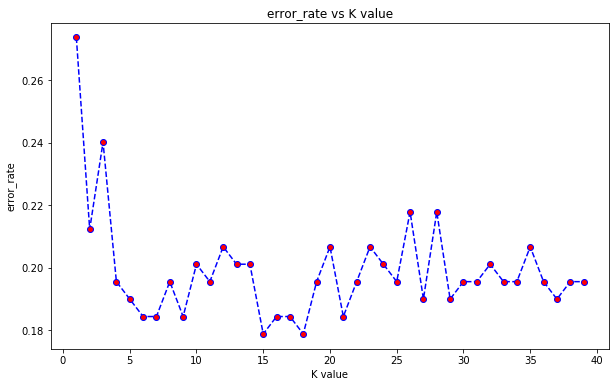

In [97]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red')
plt.xlabel('K value')
plt.ylabel('error_rate')
plt.title('error_rate vs K value')



In [106]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)

In [107]:
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

79.63

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.84      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179

